In [1]:
# install deps
!pip install kagglehub
!pip install tensorflow

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("anilkrsah/deepmushroom")

print("Path to dataset files:", path)

100%|██████████| 1.33G/1.33G [00:24<00:00, 57.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/anilkrsah/deepmushroom/versions/1


In [3]:
# import libs
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from PIL import Image
import numpy as np
import random
from random import shuffle

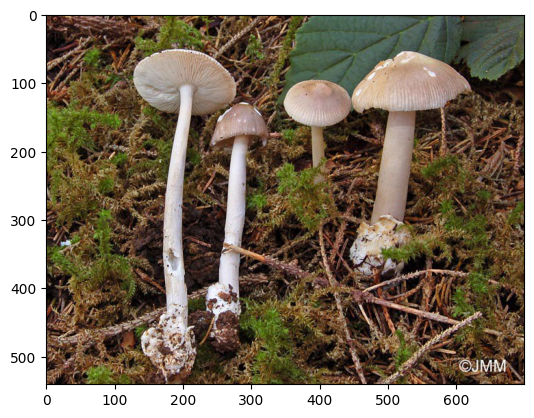

In [4]:
# checkout the dataset to make sure it works
data_path = path + "/Mushrooms/"
test_img = mpimg.imread(data_path + "Amanita/002_pJY3-9Ttfto.jpg")
img = plt.imshow(test_img)
plt.show()

In [16]:
# build the dataset
x = []
y = []

# get labels
labels = []
for species in os.listdir(data_path):
  label = species.lower()
  labels.append(label)

def one_hot_encode(label):
  one_hot_labels = []
  for species in labels:
    if species == label:
      one_hot_labels.append(1)
    else:
      one_hot_labels.append(0)
  return one_hot_labels

# go over all folders in the dataset
for species in os.listdir(data_path):
  label = species.lower()
  for image in os.listdir(data_path + species):
    image_path = data_path + species + "/" + image
    img = Image.open(image_path)
    img = img.resize((128, 128))
    img = img.convert("RGB")
    #img = img.convert("L")
    img_arr = np.array(img)
    x.append(img_arr)
    y.append(one_hot_encode(label))

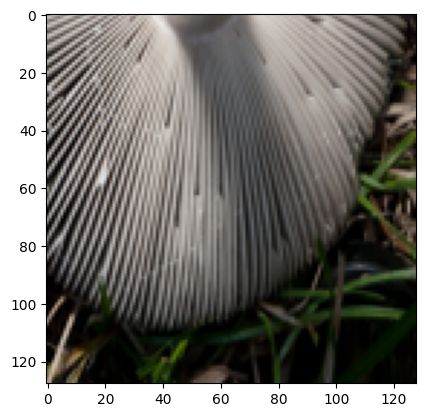

[[[114 109 107]
  [160 154 149]
  [199 191 183]
  ...
  [ 31  26  24]
  [ 24  19  17]
  [ 23  17  18]]

 [[202 195 188]
  [197 188 183]
  [170 159 155]
  ...
  [ 32  27  26]
  [ 37  31  29]
  [ 21  15  14]]

 [[145 138 132]
  [122 113 108]
  [126 119 114]
  ...
  [ 26  22  22]
  [ 59  51  47]
  [ 26  21  18]]

 ...

 [[114 107  71]
  [186 169 154]
  [141 131 102]
  ...
  [  9   4   3]
  [  5   4   2]
  [ 16   9   7]]

 [[143 133 109]
  [190 175 159]
  [ 77  71  51]
  ...
  [  7   5   4]
  [ 10   6   5]
  [  8   6   5]]

 [[177 160 144]
  [163 149 136]
  [ 38  33  23]
  ...
  [  6   4   3]
  [  9   5   4]
  [  4   3   2]]]


In [17]:
# test output
plt.imshow(Image.fromarray(x[2000]))
plt.show()
print(x[2000])

In [18]:
temp = list(zip(x, y))
random.shuffle(temp)
x, y = zip(*temp)
x = list(x)
y = list(y)
print(len(x), len(y))

9533 9533


In [19]:
# training test split

x_train = np.array(x[0:int(0.8 * len(x))])
x_test = np.array(x[int(0.8 * len(x)):])
y_train = np.array(y[0:int(0.8 * len(y))])
y_test = np.array(y[int(0.8 * len(y)):])
print(len(x_train), len(y_train))

7626 7626


In [37]:
# build the model
model = models.Sequential()
model.add(layers.Conv2D(64, (2, 2), activation='sigmoid', input_shape = (128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (2, 2), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))

In [38]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(12))

In [39]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_87 (Conv2D)                   │ (None, 127, 127, 64)        │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_78 (MaxPooling2D)      │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_88 (Conv2D)                   │ (None, 62, 62, 64)          │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_79 (MaxPooling2D)      │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_89 (Conv2D)                   │ (None, 30, 30, 64)          │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_80 (MaxPooling2D)      │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_90 (Conv2D)                   │ (None, 14, 14, 64)          │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_81 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_91 (Conv2D)                   │ (None, 6, 6, 64)            │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_82 (MaxPooling2D)      │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_92 (Conv2D)                   │ (None, 2, 2, 64)            │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_83 (MaxPooling2D)      │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 12)                  │             780 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 88,012 (343.80 KB)

 Trainable params: 88,012 (343.80 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(optimizer = 'adamw',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])
result = model.fit(x_train, y_train, epochs = 40, validation_data=(x_test, y_test))

Epoch 1/40
239/239 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.1104 - loss: 2.4543 - val_accuracy: 0.1940 - val_loss: 2.3061
Epoch 2/40
239/239 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.1844 - loss: 2.3085 - val_accuracy: 0.1977 - val_loss: 2.2547
Epoch 3/40
239/239 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.2286 - loss: 2.2219 - val_accuracy: 0.2606 - val_loss: 2.1633
Epoch 4/40
239/239 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.2757 - loss: 2.0985 - val_accuracy: 0.2837 - val_loss: 2.0265
Epoch 5/40
239/239 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.3045 - loss: 2.0164 - val_accuracy: 0.2926 - val_loss: 2.0064
Epoch 6/40
239/239 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.3292 - loss: 1.9442 - val_accuracy: 0.3136 - val_loss: 1.9861
Epoch 7/40
239/239 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.3540 - loss: 1.8774 - val_accuracy: 0.3199 - val_loss: 1.9598
Epoch 8/40
239/239 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.3708 - loss: 1.8046 - val_a

In [41]:
# save the model to disk
model.save("model.keras")